In [28]:
include("/Users/meesvandartel/Desktop/Projects/LPR projects/FinGrowthABM_repo/GrowthNetwork.jl")
using .GrowthIAF, Measures, Plots, HypothesisTests, ProgressMeter, GraphPlot

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


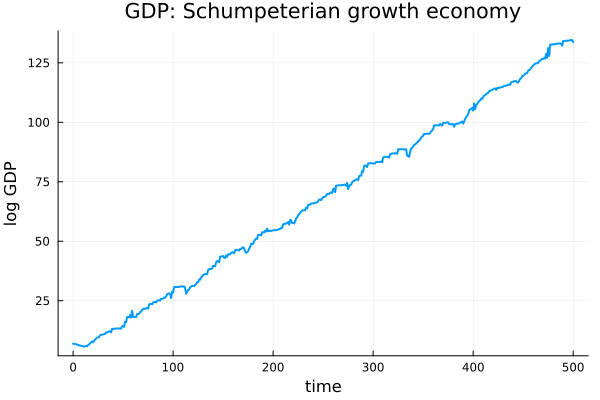

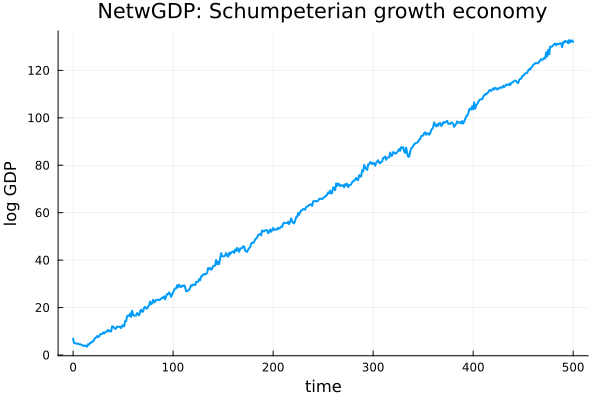

In [29]:
model1 = GrowthIAF.initialize_econ(;seed = 42, n_firms=100, betadist=(5, 2), p_out = 0.5)
GDP_series = []
out_series = []
dates = 0:500

@showprogress for t in dates

    GDP = 0
    out = 0
    for agent in allagents(model1)
        Q = agent.Q
        output = agent.output
        GDP += Q
        out += output
    end
    push!(GDP_series, log(GDP))
    push!(out_series, log(out))
    step!(model1)
end
GDP_series = convert(Vector{Float64}, GDP_series)
out_series = convert(Vector{Float64}, out_series)

p = plot(dates, GDP_series,
    title="GDP: Schumpeterian growth economy", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)

p2 = plot(dates, out_series,
    title="NetwGDP: Schumpeterian growth economy", xlabel="time", ylabel="log GDP", linewidth=2, legend=false, grid=true)


#Display the plot
display(p)
display(p2)

## Interpretation:
### The stochasticity of Q makes things less smooth, while increasing p_out makes things more smooth

### The economy looks like this:

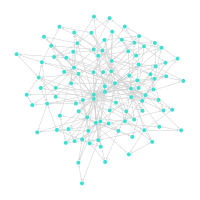

In [30]:
gplot(model1.network, layout=spring_layout, plot_size=(200mm, 200mm), arrowlengthfrac=0.03)  # Use `plot_size` instead of `width` and `height`